# Filtering signal with a butterworth low-pass filter and plotting the STFT of it with a Hann-Poisson window

Let's start by generating data. Let's assume that we have a sampling rate of 50 Hz over 10 seconds.

In [1]:
import numpy as np

# Generate a random x(t) signal with waves and noise. 
sample_rate = 50  # 50 Hz resolution
signal_lenght = 10*sample_rate  # 10 seconds
t = np.linspace(-1, 1, signal_lenght)
x = np.sin(2*np.pi*0.75*t*(1-t) + 2.1) 
x += 0.1*np.sin(2*np.pi*1.25*t + 1) 
x += 0.18*np.cos(2*np.pi*3.85*t)
x += np.random.randn(len(t)) * 0.08


## Filtering the generated data: 

Let's keep only what's below 15 Hz with a butterworth low-pass filter of order 4. Sharper cutoff can be obtained with higher orders. 
Butterworth low-pass filters has frequency responses that look like that according to their order: 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Butterworth_Filter_Orders.svg/350px-Butterworth_Filter_Orders.svg.png" alt="Butterworth low-pass filter" style="width: 550px;" />

Let's proceed and filter the data. 

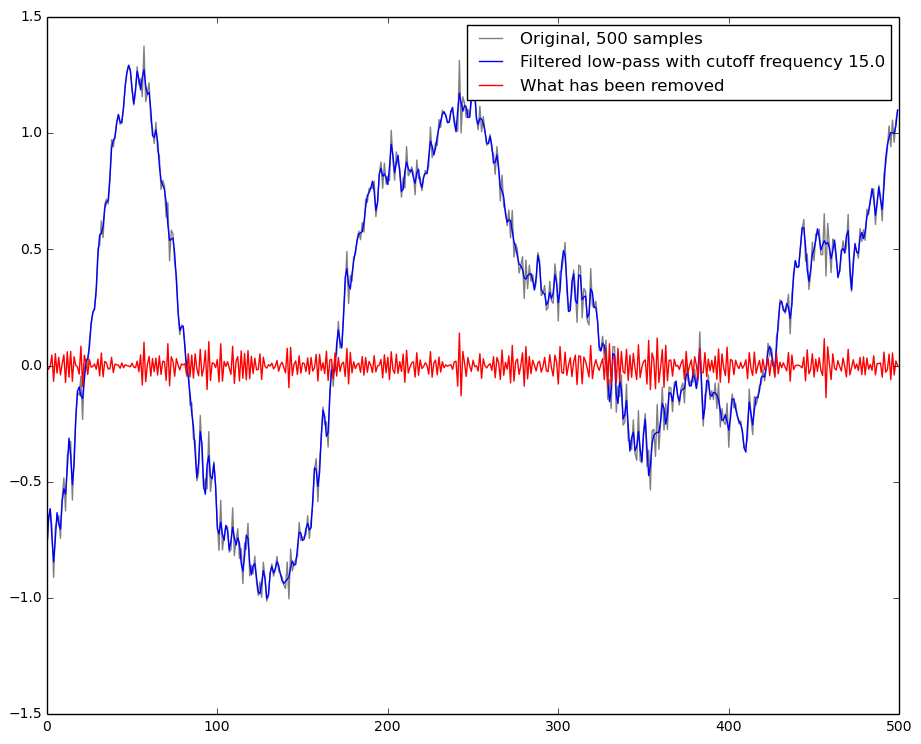

In [2]:
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline 


def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# Filter signal x, result stored to y: 
cutoff_frequency = 15.0
y = butter_lowpass_filter(x, cutoff_frequency, sample_rate/2)

# Difference acts as a special high-pass from a reversed butterworth filter. 
diff = np.array(x)-np.array(y)

# Visualize
plt.figure(figsize=(11, 9))
plt.plot(x, color='gray', label="Original, {} samples".format(signal_lenght))
plt.plot(y, color='blue', label="Filtered low-pass with cutoff frequency {}".format(cutoff_frequency))
plt.plot(diff, color='red', label="What has been removed")
plt.legend()
plt.show()


## Plotting the spectrum with STFTs. 

Note that if you don't have the library `spectrum`, you can use the [Hanning window](https://en.wikipedia.org/wiki/Window_function#Hann_.28Hanning.29_window) instead of the [Hann-Poisson](https://en.wikipedia.org/wiki/Window_function#Hann.E2.80.93Poisson_window). To do so in the code, switch the variable `w` to the commented value in the `stft` (and `istft`) functions. 

x, original:


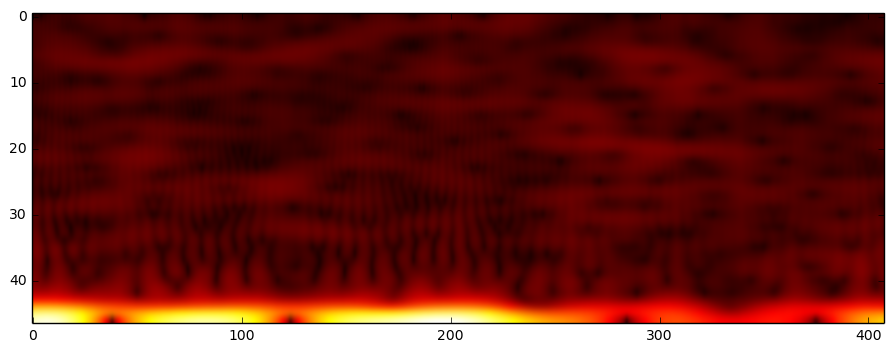

y, which is x filtered out:


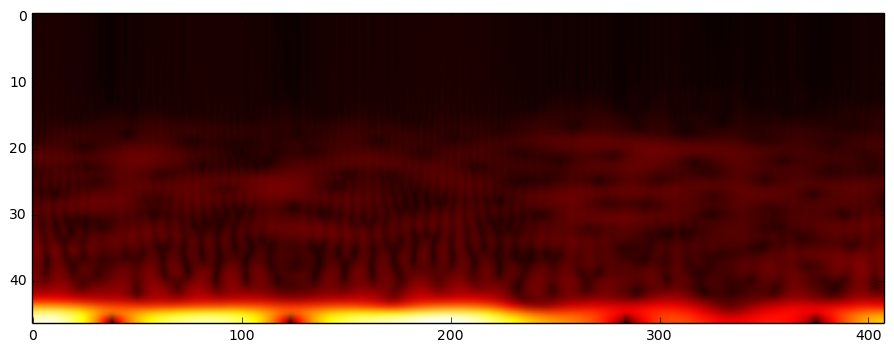

Difference (notice changes in color due to plt's rescaling):


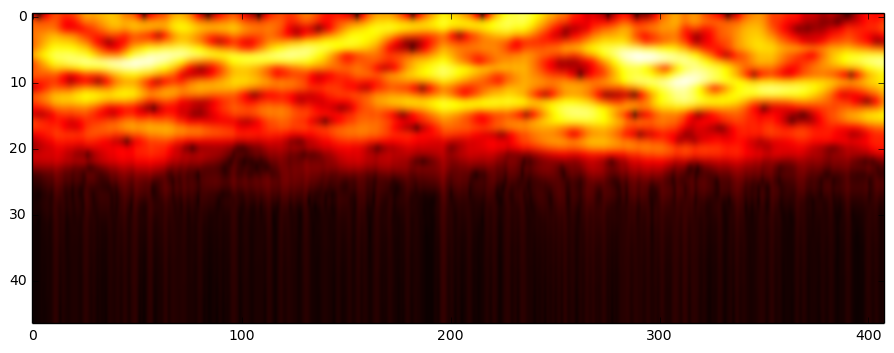

In [3]:
import spectrum
import scipy


def stft(x, fftsize=1024, overlap=4):
    # Short-time Fourier transform
    hop = fftsize / overlap
    
    # w = scipy.hanning(fftsize+1)[:-1]      # better reconstruction with this trick +1)[:-1]  
    w = spectrum.window_poisson_hanning(fftsize+1, alpha=2)[:-1]
    
    return np.array([np.fft.rfft(w*x[i:i+fftsize]) for i in range(0, len(x)-fftsize, hop)])

# Here we don't use the ISTFT but having the function may be useful to some, 
# it is a bit modified than what's found on Stack Overflow: 
# def istft(X, overlap=4):
#     # Inverse Short-time Fourier transform
#     fftsize=(X.shape[1]-1)*2
#     hop = fftsize / overlap
#     
#     # w = scipy.hanning(fftsize+1)[:-1]
#     w = spectrum.window_poisson_hanning(fftsize+1, alpha=2)[:-1]
#     
#     x = scipy.zeros(X.shape[0]*hop)
#     wsum = scipy.zeros(X.shape[0]*hop) 
#     for n,i in enumerate(range(0, len(x)-fftsize, hop)): 
#         x[i:i+fftsize] += scipy.real(np.fft.irfft(X[n])) * w   # overlap-add
#         wsum[i:i+fftsize] += w ** 2.
#     pos = wsum != 0
#     x[pos] /= wsum[pos]
#     return x

def plot_stft(x, interpolation='bicubic'):
    # Use 'none' interpolation for a sharp plot. 
    plt.figure(figsize=(11, 4))
    sss = stft(np.array(x), window_size, overlap)
    complex_norm = np.sqrt(np.absolute(sss)).transpose()[::-1]
    plt.imshow(complex_norm, aspect='auto', interpolation=interpolation, cmap=plt.cm.hot)
    # plt.yscale('log')
    plt.show()


window_size = 92  # a.k.a. fftsize
overlap = window_size  # This takes a maximal overlap


# Plots in the STFT time-frequency domain: 

print "x, original:"
plot_stft(x)

print "y, which is x filtered out:"
plot_stft(y)

print "Difference (notice changes in color due to plt's rescaling):"
plot_stft(diff)


## Other interesting stuff

If you want to know more about STFTs, FFTs and related signal processing, you may want to watch those videos I watched to understand the matter:

https://www.youtube.com/playlist?list=PLlp-GWNOd6m6gSz0wIcpvl4ixSlS-HEmr

## Connect with me

- https://ca.linkedin.com/in/chevalierg
- https://twitter.com/guillaume_che
- https://github.com/guillaume-chevalier/

In [4]:
# Let's convert this notebook to a README as the GitHub project's title page:
!jupyter nbconvert --to markdown Filtering.ipynb
!mv Filtering.md README.md

[NbConvertApp] Converting notebook Filtering.ipynb to markdown
[NbConvertApp] Support files will be in Filtering_files/
[NbConvertApp] Making directory Filtering_files
[NbConvertApp] Making directory Filtering_files
[NbConvertApp] Making directory Filtering_files
[NbConvertApp] Making directory Filtering_files
[NbConvertApp] Writing 5531 bytes to Filtering.md
